In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
Pressure = [100, 75, 65, 55, 40, 30] # hPa
Height   = [16,  18, 19, 20, 22, 24] # km

Season = ["Winter", "Spring", "Summer", "Autumn"]

In [4]:
N_head = 5 # first 5 lines are head lines, not include data
N_column = 4 + 2

# Nx = 36
# Ny = 21
# Nz = 5
# N_parcel = 3780

Nx = 24
Ny = 21
Nz = 6
N_parcel = Nx*Ny*Nz

if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    

directory = '../Lifetime/'
filename = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory+filename)

../Lifetime/Lifetime_20000101.txt


In [5]:
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lon = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lat = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lev = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime.shape

(6, 21, 24, 10, 12, 10)

In [6]:
for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File = open(directory+filename, 'r')
        
            Lines = File.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            data_x = []
            data_y = []
            data_z = []
            for line in Lines:
                a = line.split(',')
                data.append(float(a[0])) # total lifetime
                data_N.append(float(a[1])) # total N lifetime
                data_S.append(float(a[2])) # total S lifetime
                data_x.append(float(a[3])) # lon
                data_y.append(float(a[4])) # lat
                data_z.append(float(a[5])) # p
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz):
                        lifetime[iz,iy,ix,i_day,i_month,i_year]   = data[i]
                        lifetime_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        Lon[iz,iy,ix,i_day,i_month,i_year] = data_x[i]
                        Lat[iz,iy,ix,i_day,i_month,i_year] = data_y[i]
                        Lev[iz,iy,ix,i_day,i_month,i_year] = data_z[i]

                        i = i+1
                        
                        

100%|██████████| 12/12 [00:02<00:00,  4.60it/s]


### Change the Lon and Lat order, and change the lifetime data order in corresponding to the Lon/Lat order

In [7]:
LON_1d = Lon[0,0,:,0,0,0]
LAT_1d = Lat[0,:,0,0,0,0]

In [8]:
# First for LON: change (0,360) to (-180,180)

#################
# correst method 1:
#################
# lifetime_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_N_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_S_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))

# print("LON Before: ", LON_1d)

# for i in range(len(LON_1d)):
#     if LON_1d[i]>=180: LON_1d[i] = LON_1d[i]-360

# # sort
# idx = np.argsort(LON_1d)
# # print(idx)

# LON_1d = LON_1d[idx]
# lifetime_season_mean_new = lifetime_season_mean[:,:,idx,:]
# lifetime_N_season_mean_new = lifetime_N_season_mean[:,:,idx,:]
# lifetime_S_season_mean_new = lifetime_S_season_mean[:,:,idx,:]

# print("LON After: ", LON_1d)

# print("")
# print(lifetime_season_mean_new.shape)


#################
# wrong method 2:
#################

lifetime_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

LON_1d = LON_1d - 180 ### shw ???


Lon_new = Lon - 180
Lat_new = Lat

lifetime_new = lifetime[:,:,:,:,:,:]
lifetime_N_new = lifetime_N[:,:,:,:,:,:]
lifetime_S_new = lifetime_S[:,:,:,:,:,:]

In [9]:
# Second for LAT: change (-20,20) to (20,-20)

Lon_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lat_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


print("LAT Before: ", LAT_1d)
LAT_1d = LAT_1d[::-1]
print("LAT After: ", LAT_1d)

Lon_new2 = Lon_new[:,::-1,:,:,:,:]
Lat_new2 = Lat_new[:,::-1,:,:,:,:]

lifetime_new2 = lifetime_new[:,::-1,:,:,:,:]
lifetime_N_new2 = lifetime_N_new[:,::-1,:,:,:,:]
lifetime_S_new2 = lifetime_S_new[:,::-1,:,:,:,:]

print("")
print(lifetime_new.shape)

LAT Before:  [-30. -27. -24. -21. -18. -15. -12.  -9.  -6.  -3.   0.   3.   6.   9.
  12.  15.  18.  21.  24.  27.  30.]
LAT After:  [ 30.  27.  24.  21.  18.  15.  12.   9.   6.   3.   0.  -3.  -6.  -9.
 -12. -15. -18. -21. -24. -27. -30.]

(6, 21, 24, 10, 12, 10)


## Seasonal mean

In [10]:


# lifetime(Nz, Ny, Nx, N_day, N_month, N_year)

lifetime_mon = np.mean(lifetime_new, axis=(3,5))
lifetime_N_mon = np.mean(lifetime_N_new, axis=(3,5))
lifetime_S_mon = np.mean(lifetime_S_new, axis=(3,5))


# lifetime_mon(Nz, Ny, Nx, N_month)
N_season = 4

lifetime_season = np.zeros((Nz, Ny, Nx, N_season))
lifetime_N_season = np.zeros((Nz, Ny, Nx, N_season))
lifetime_S_season = np.zeros((Nz, Ny, Nx, N_season))


# for Winter
lifetime_season[:,:,:,0]   = np.mean(lifetime_mon[:,:,:,[0,1,11]], axis=3)
lifetime_N_season[:,:,:,0] = np.mean(lifetime_N_mon[:,:,:,[0,1,11]], axis=3)
lifetime_S_season[:,:,:,0] = np.mean(lifetime_S_mon[:,:,:,[0,1,11]], axis=3)
    
# for Spring, Summer and Autumn
for i in range(1,N_season):
    print(i,i*3-1,(i+1)*3-1)
    lifetime_season[:,:,:,i]   = np.mean(  lifetime_mon[:,:,:,i*3-1:(i+1)*3-1], axis=3)
    lifetime_N_season[:,:,:,i] = np.mean(lifetime_N_mon[:,:,:,i*3-1:(i+1)*3-1], axis=3)
    lifetime_S_season[:,:,:,i] = np.mean(lifetime_S_mon[:,:,:,i*3-1:(i+1)*3-1], axis=3)
    
lifetime_season.shape

1 2 5
2 5 8
3 8 11


(6, 21, 24, 4)

## Strategy_Uni

In [11]:
Inject_Percent_Uni = np.zeros((Nz, Ny, Nx, N_season))
Inject_Percent_Uni[:,:,:,:] = 1/(Nx*Ny)*100 # (unit: %)

D_lifetime_uniform = lifetime_N_season[:,:,:,:] - lifetime_S_season[:,:,:,:]

In [12]:
Nx*Ny

504

In [13]:
# Inject_Percent_Uni

## Strategy_LP

In [14]:
# LP solver

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html

# (Nz, Ny, Nx, N_season)

Inject_Percent_LP = np.zeros((Nz, Ny, Nx, N_season))

Result_season  = lifetime_season[0,:,:,:]*0.0
Lifetime_LP    = lifetime_season[:,:,:,:]*0.0
Lifetime_LP_N  = lifetime_season[:,:,:,:]*0.0
Lifetime_LP_S  = lifetime_season[:,:,:,:]*0.0
D_lifetime_LP  = lifetime_season[:,:,:,:]*0.0

iz = 1

Diff_NS = 0.01

# for LP solve: max lifetime under the interhemispheric balance
for iz in range(Nz):
    print(iz)
    for iseason in range(N_season):
        Life   = lifetime_season[iz,:,:,iseason].flatten()
        Life_S = lifetime_N_season[iz,:,:,iseason].flatten()
        Life_N = lifetime_S_season[iz,:,:,iseason].flatten()

        if sum(Life_S)+sum(Life_N)-sum(Life)>0.01: print("ERROR!!!")
    
        N = len(Life)

        #
        c = -1*Life

        Xs_bounds = []
        A1 = []
        A3 = []
        A4 = []
        A  = []
        for i in range(N):
            Xs_bounds.append((0, N))
            A1.append(1)
            A3.append( Life_N[i] -Life_S[i] -Diff_NS*Life[i] )
            A4.append( -1*(Life_N[i] -Life_S[i] +Diff_NS*Life[i]) )

        Aub = [A3,A4]
        Aeq = [A1]   

        b_ub = [0,0]
        b_eq = [N]

        from scipy.optimize import linprog
        res = linprog(c, A_eq=Aeq, b_eq=b_eq, A_ub=Aub, b_ub=b_ub, bounds=Xs_bounds)
    
        # post-process, calculate the injection percentage
        Result1d = np.round(res.x)
        Result2d = Result1d.reshape(Ny,Nx)
        Result2d = Result2d/np.sum(Result2d)*100
    
        Result_season[:,:,iseason] = Result2d
    
    Inject_Percent_LP[iz,:,:,:] = Result_season # (unit: %)
    
    Lifetime_LP[iz,:,:,:] = lifetime_season[iz,:,:,:]* (Result_season/100)

    Lifetime_LP_N[iz,:,:,:] = lifetime_N_season[iz,:,:,:]* (Result_season/100)
    Lifetime_LP_S[iz,:,:,:] = lifetime_S_season[iz,:,:,:]* (Result_season/100)
    D_lifetime_LP[iz,:,:,:] = Lifetime_LP_N[iz,:,:,:] - Lifetime_LP_S[iz,:,:,:]

print(lifetime_season[:,:,:,:].shape, Result_season.shape)


0
1
2
3
4
5
(6, 21, 24, 4) (21, 24, 4)


## Stratege_Y

In [15]:
# get max lifetime by only selecting LAT (averaged over all LON)

Inject_Percent_Y = np.zeros((Nz, Ny, Nx, N_season))

lifetime_season_Xmean   = np.mean(lifetime_season, axis=2)
lifetime_N_season_Xmean = np.mean(lifetime_N_season, axis=2)
lifetime_S_season_Xmean = np.mean(lifetime_S_season, axis=2)
print(lifetime_season_Xmean.shape)

Inject_percent    = np.zeros((Nz, Ny, N_season))
Lifetime_MaxLat   = np.zeros((Nz, Ny, N_season))
Lifetime_MaxLat_N = np.zeros((Nz, Ny, N_season))
Lifetime_MaxLat_S = np.zeros((Nz, Ny, N_season))
D_lifetime_MaxLat = np.zeros((Nz, Ny, N_season))
print(Inject_percent.shape)

for iz in range(Nz):
    for i_season in range(N_season):
        a   = np.mean(lifetime_season[iz,:,:,i_season], axis=1)
        idx = np.unravel_index(np.argmax(a, axis=None), a.shape)
#         print(iz,idx[0],i_season)
        Inject_percent[iz,idx[0],i_season] = 100
        Inject_Percent_Y[iz,idx[0],:,i_season] = 1.0/Nx*100 # (unit:%)

    Lifetime_MaxLat[iz,:,:] = lifetime_season_Xmean[iz,:,:]* (Inject_percent[iz,:,:]/100)

    Lifetime_MaxLat_N[iz,:,:] = lifetime_N_season_Xmean[iz,:,:]* (Inject_percent[iz,:,:]/100)
    Lifetime_MaxLat_S[iz,:,:] = lifetime_S_season_Xmean[iz,:,:]* (Inject_percent[iz,:,:]/100)
    D_lifetime_MaxLat[iz,:,:] = Lifetime_MaxLat_N[iz,:,:] - Lifetime_MaxLat_S[iz,:,:]

(6, 21, 4)
(6, 21, 4)


In [16]:
# Inject_Percent_Y[1,:,:,0]

## Strategy_XY

In [17]:
# get the max lifetime by selecting both LON and LAT

Inject_Percent_XY = np.zeros((Nz, Ny, Nx, N_season))

Inject_percent = np.zeros((Nz, Ny, Nx, N_season))
Lifetime_max   = np.zeros((Nz, Ny, Nx, N_season))
Lifetime_max_N = np.zeros((Nz, Ny, Nx, N_season))
Lifetime_max_S = np.zeros((Nz, Ny, Nx, N_season))
D_lifetime_max = np.zeros((Nz, Ny, Nx, N_season))

print(Inject_percent.shape)

for iz in range(Nz):
    for i_season in range(N_season):
        a   = lifetime_season[iz,:,:,i_season]
        # Converts a flat index or array of flat indices into a tuple of coordinate arrays
        idx = np.unravel_index(np.argmax(a, axis=None), a.shape) 
#         print(iz,idx[0],idx[1],i_season)
        Inject_percent[iz,idx[0],idx[1],i_season] = 100
        Inject_Percent_XY[iz,idx[0],idx[1],i_season] = 100 # (unit:%)

    Lifetime_max[iz,:,:,:] = lifetime_season[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)

    Lifetime_max_N[iz,:,:,:] = lifetime_N_season[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)
    Lifetime_max_S[iz,:,:,:] = lifetime_S_season[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)
    D_lifetime_max[iz,:,:,:] = Lifetime_max_N[iz,:,:,:] - Lifetime_max_S[iz,:,:,:]
    

(6, 21, 24, 4)


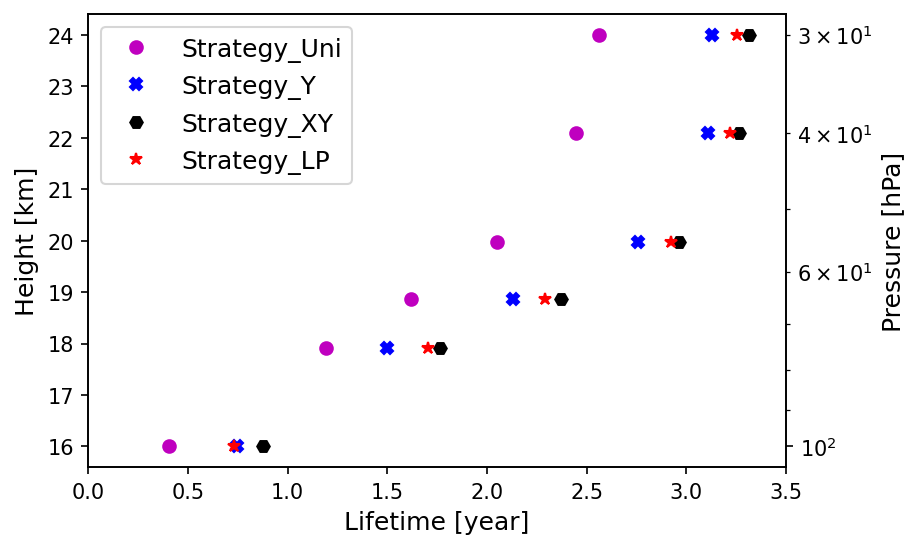

In [18]:
Life_LP_season = np.sum(Lifetime_LP[:,:,:,:], axis=(1,2))/365.25
Life_MaxLat_season = np.sum(Lifetime_MaxLat[:,:,:], axis=(1))/365.25
Life_max_season = np.sum(Lifetime_max[:,:,:,:], axis=(1,2))/365.25
Life_uniform_season = np.mean(lifetime_season[:,:,:,:],axis=(1,2))/365.25

Life_LP_z  = np.mean(Life_LP_season[:,:],axis=1)
Life_MaxLat_z = np.mean(Life_MaxLat_season[:,:],axis=1)
Life_max_z = np.mean(Life_max_season[:,:],axis=1)
Life_uniform_z = np.mean(Life_uniform_season[:,:],axis=1)

### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

###
ax1.plot(Life_uniform_z, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,3.5)

ax1.set_xlabel('Lifetime [year]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(Life_uniform_z, Pressure, 'mo', label='Strategy_Uni')
ax2.plot(Life_MaxLat_z, Pressure, 'bX', label='Strategy_Y')
ax2.plot(Life_max_z, Pressure, 'kH', label='Strategy_XY')
ax2.plot(Life_LP_z, Pressure, 'r*', label='Strategy_LP')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper left", fontsize=12);

###
# ax3 = ax1.twinx()
# ax3.plot(Life_LP_z, Pressure, 'b*', label='LP solver lifetime')

# ax3.set_ylabel('Pressure [hPa]', fontsize=12)
# ax3.set_yscale('log')
# ax3.invert_yaxis()
# ax3.legend(loc="upper left", fontsize=12);


# plt.title('Lifetime at different height (seasonal data)', fontsize=14);

In [19]:
np.max(Life_max_z)

3.3149806068902574

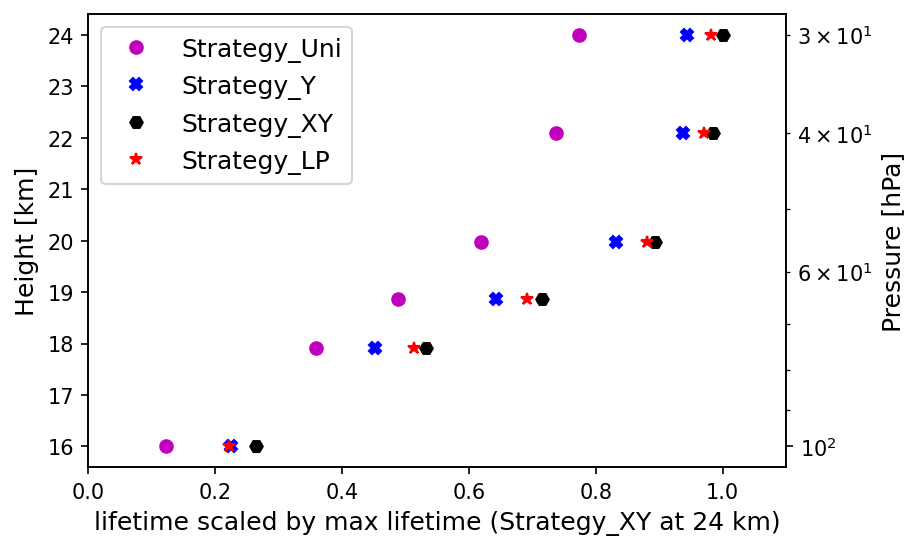

In [20]:
### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

Maximum = np.max(Life_max_z)

###
ax1.plot(Life_uniform_z/Maximum, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,1.1)

ax1.set_xlabel('lifetime scaled by max lifetime (Strategy_XY at 24 km)', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(Life_uniform_z/Maximum, Pressure, 'mo', label='Strategy_Uni')
ax2.plot(Life_MaxLat_z/Maximum, Pressure, 'bX', label='Strategy_Y')
ax2.plot(Life_max_z/Maximum, Pressure, 'kH', label='Strategy_XY')
ax2.plot(Life_LP_z/Maximum, Pressure, 'r*', label='Strategy_LP')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper left", fontsize=12);

In [21]:

Life_max_AllMean = np.mean(Life_max_z)
Life_LP_AllMean = np.mean(Life_LP_z)
Life_MaxLat_AllMean = np.mean(Life_MaxLat_z)
Life_uniform_AllMean = np.mean(Life_uniform_z)

Life_max_AllMean, Life_LP_AllMean, Life_MaxLat_AllMean, Life_uniform_AllMean

(2.426231652597156, 2.3544583947478657, 2.228729371054833, 1.7125323060055262)

In [22]:
D_lifetime_LP.shape, D_lifetime_max.shape, D_lifetime_MaxLat.shape, D_lifetime_uniform.shape

((6, 21, 24, 4), (6, 21, 24, 4), (6, 21, 4), (6, 21, 24, 4))

In [23]:
# use np.sum if a injection percent is applied to the variable before

D_lifetime_LP_XYmean      = np.sum(D_lifetime_LP, axis=(1,2))
D_lifetime_MaxLat_XYmean  = np.sum(D_lifetime_MaxLat, axis=(1))
D_lifetime_max_XYmean     = np.sum(D_lifetime_max, axis=(1,2))
D_lifetime_uniform_XYmean = np.mean(D_lifetime_uniform, axis=(1,2))

D_lifetime_LP_XYmean.shape, D_lifetime_max_XYmean.shape, D_lifetime_MaxLat_XYmean.shape, D_lifetime_uniform_XYmean.shape

((6, 4), (6, 4), (6, 4), (6, 4))

In [24]:
print(np.mean(abs(D_lifetime_LP_XYmean), axis=1))
print(np.mean(abs(D_lifetime_max_XYmean), axis=1))
print(np.mean(abs(D_lifetime_MaxLat_XYmean), axis=1))
print(np.mean(abs(D_lifetime_uniform_XYmean), axis=1))

[ 2.43853671  6.17546131  8.27566799 10.58869213 11.88936343  9.44484458]
[232.14333333 154.12416667 192.81333333 126.51583333 253.65166667
 240.555     ]
[203.3871875  198.32309028 187.7775      61.94118056 209.01902778
 243.13340278]
[23.94752811 36.41635747 34.4599752  21.48597222 18.72075728 34.56604828]


In [25]:
print(np.mean(abs(D_lifetime_LP_XYmean), axis=(0,1))/365.25)
print(np.mean(abs(D_lifetime_max_XYmean), axis=(0,1))/365.25)
print(np.mean(abs(D_lifetime_MaxLat_XYmean), axis=(0,1))/365.25)
print(np.mean(abs(D_lifetime_uniform_XYmean), axis=(0,1))/365.25)

0.02227358710361223
0.5474804167617311
0.5035735290389636
0.07738838172858822


## Supporting Information

### check Lon, Lat are correct !!!

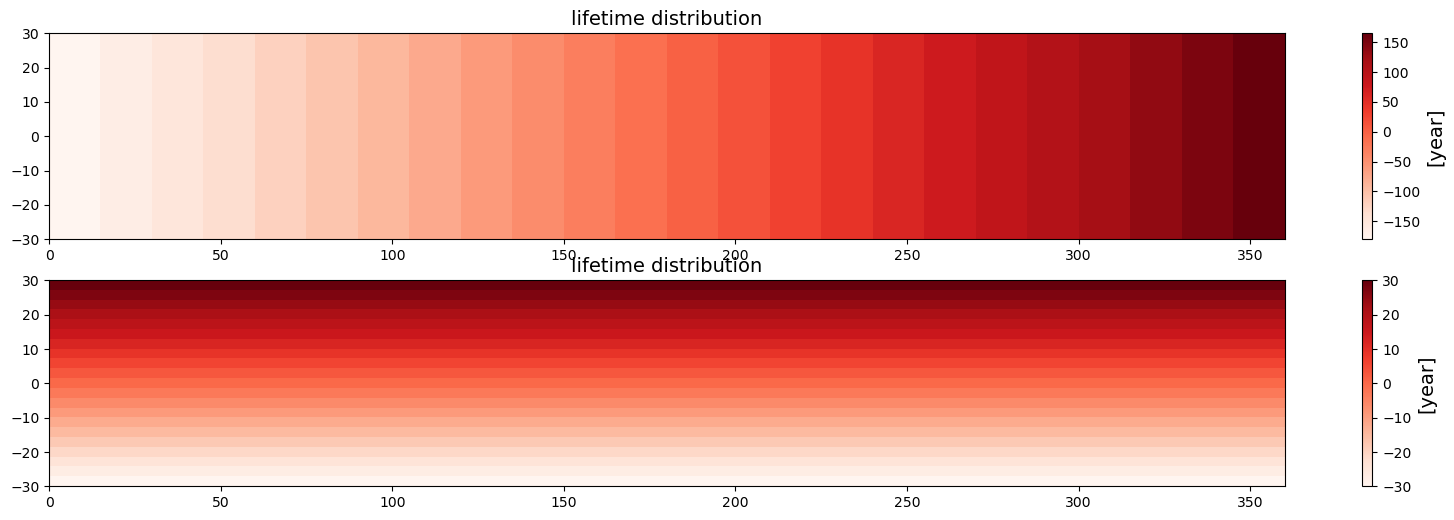

In [26]:

fig = plt.figure(figsize=(20,6), dpi=100)
extent = [0 , 360 , -30 , 30]

# Lon[iz,iy,ix,i_day,i_month,i_year]
# lifetime
ax0 = plt.subplot(2, 1, 1)

ax0_pixel = plt.imshow(Lon_new2[0,:,:,0,0,0],\
           extent = extent, cmap='Reds', interpolation='nearest')

cb0 = plt.colorbar(ax0_pixel, ax=ax0)
cb0.set_label('[year]', fontsize=14);

ax0.set_title(f"lifetime distribution", fontsize=14);
# ax0.set_title(f"Month: {i_mon+1}", fontsize=14, loc="left");


###
ax1 = plt.subplot(2, 1, 2)

ax1_pixel = plt.imshow(Lat_new2[0,:,:,0,0,0],\
           extent = extent, cmap='Reds', interpolation='nearest')

cb1 = plt.colorbar(ax1_pixel, ax=ax1)
cb1.set_label('[year]', fontsize=14);

ax1.set_title(f"lifetime distribution", fontsize=14);
# ax1.set_title(f"Month: {i_mon+1}", fontsize=14, loc="left");

In [27]:
from copy import copy

palette = copy(plt.get_cmap('Reds'))
palette.set_under('white', 1.0)  # 1.0 represents not transparent

In [28]:
# Inject_Percent_Uni[iz,:,:,i_season]*100

18


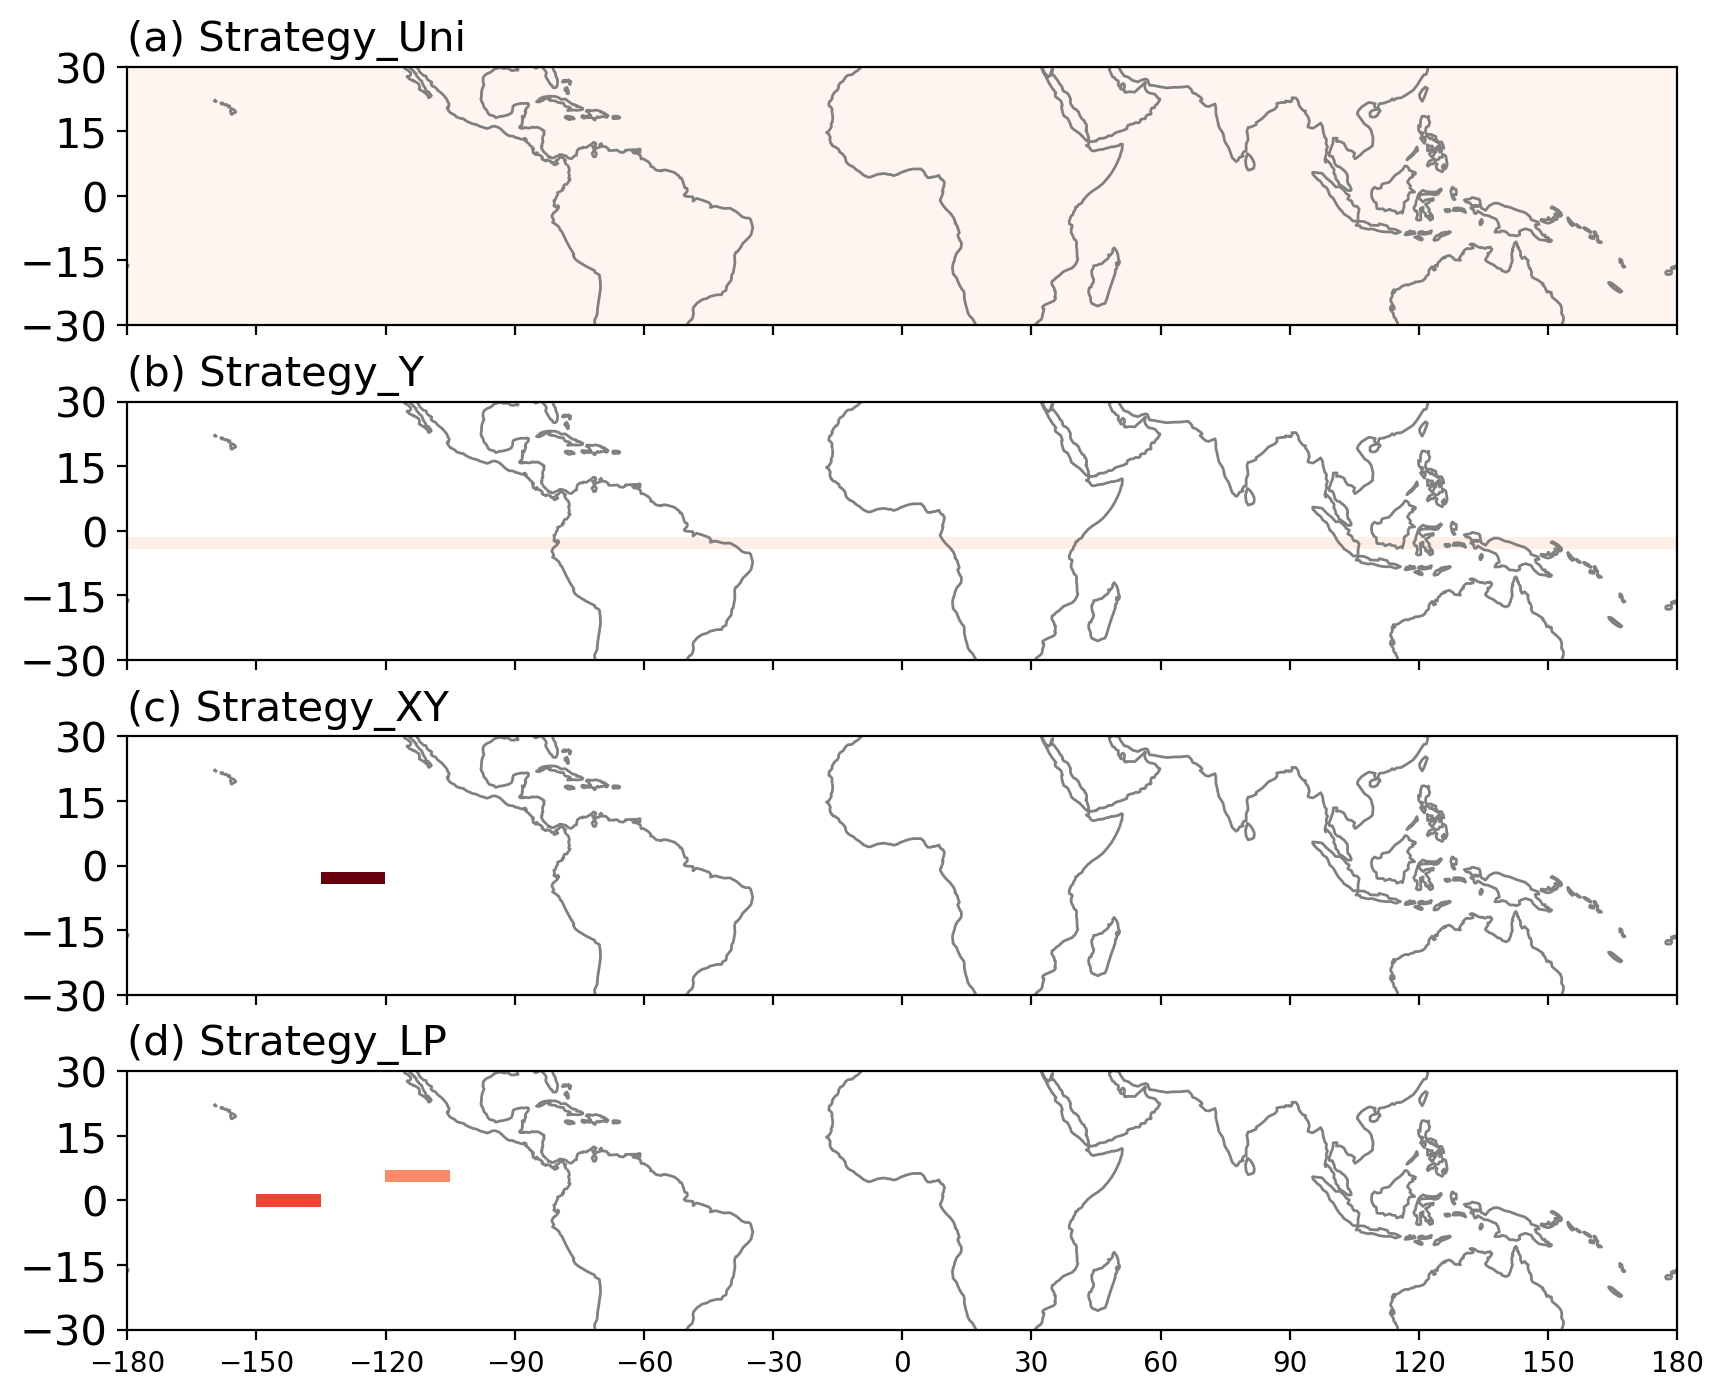

In [29]:
# Height   = [16,  18, 19, 20, 22, 24] # km

iz=1
i_season = 0
print(Height[iz])

fig = plt.figure(figsize=(10,8.5), dpi=200)
projection = crs.PlateCarree()
    
    
extent = [-180 , 180 , -30 , 30]

#-----------------------------
# Strategy_Uni
#-----------------------------
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_Uni = np.where(Inject_Percent_Uni < 1e-10, -1.0, Inject_Percent_Uni)
ax1_pixel = plt.imshow(Inject_Percent_Uni[iz,:,:,i_season], vmin=0.01, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')

    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1, extend='both', orientation = "horizontal")
# cb1.set_label('[%]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title("(a) Strategy_Uni", loc='left', fontsize=15)


#-----------------------------
# Strategy_Y
#-----------------------------
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_Y = np.where(Inject_Percent_Y < 1e-10, -1.0, Inject_Percent_Y)
ax2_pixel = plt.imshow(Inject_Percent_Y[iz,:,:,i_season], vmin=0, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, extend='min', ax=ax2)
# cb2.set_label('[%]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_title("(b) Strategy_Y", loc='left', fontsize=15)


#-----------------------------
# Strategy_XY
#-----------------------------
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_XY = np.where(Inject_Percent_XY < 1e-10, -1.0, Inject_Percent_XY)
ax2_pixel = plt.imshow(Inject_Percent_XY[iz,:,:,i_season], vmin=0, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')

    
# cb3 = plt.colorbar(ax3_pixel, extend='min', ax=ax3)
# cb3.set_label('[%]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_title("(c) Strategy_XY", loc='left', fontsize=15)


#-----------------------------
# Strategy_LP
#-----------------------------
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_LP = np.where(Inject_Percent_LP < 1e-10, -1.0, Inject_Percent_LP)
ax4_pixel = plt.imshow(Inject_Percent_LP[iz,:,:,i_season], vmin=0, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')


ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax4.tick_params(axis='y', labelsize=15 )

ax4.set_title("(d) Strategy_LP", loc='left', fontsize=15)

# cb4 = plt.colorbar(ax4_pixel, ax=ax4, extend='both', orientation = "horizontal")
# cb4.set_label('[%]', fontsize=12);

plt.show()

18


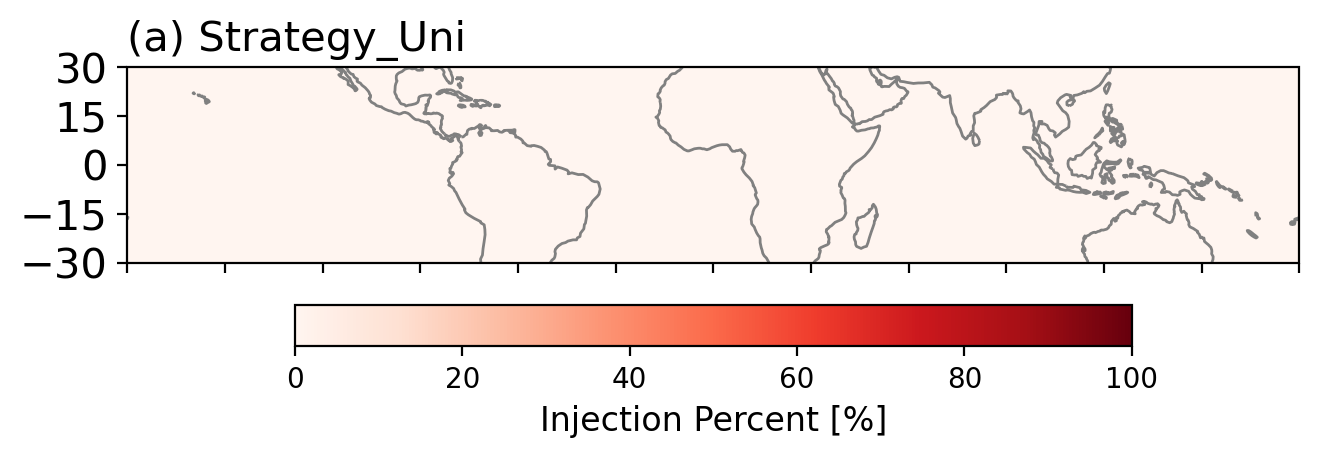

In [30]:
# Height   = [16,  18, 19, 20, 22, 24] # km

iz=1
i_season = 0
print(Height[iz])

fig = plt.figure(figsize=(10,8.5), dpi=200)
projection = crs.PlateCarree()
    
    
extent = [-180 , 180 , -30 , 30]

#-----------------------------
# Strategy_Uni
#-----------------------------
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

Inject_Percent_Uni = np.where(Inject_Percent_Uni < 1e-10, -1.0, Inject_Percent_Uni)
ax1_pixel = plt.imshow(Inject_Percent_Uni[iz,:,:,i_season], vmin=0, vmax=100,\
           extent = extent, cmap=palette, interpolation='nearest')


ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

# ax1.set_title("18 km", fontsize=20)
# ax1.set_ylabel("Winter", fontsize=15)
ax1.set_title("(a) Strategy_Uni", loc='left', fontsize=15)


cb1 = plt.colorbar(ax1_pixel, ax=ax1, orientation = "horizontal")
cb1.set_label('Injection Percent [%]', fontsize=12);

plt.show()